<a href="https://colab.research.google.com/github/IrfanPavel/Transfer-Learning-with-Tensorflow-Fine-Tuning/blob/main/Transfer_Learning_with_Tensorflow_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The difference between Feature Extraction and Fine Tuning is:More layers of pre trained model get unfrozen and tuned on custom data.The Fine Tuning usually takes more data than feature extraction to be effective

In [1]:
#Get helper_functions.py script 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data,walk_through_dir

--2022-06-30 14:35:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-30 14:35:07 (68.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2022-06-30 14:35:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 74.125.141.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   137MB/s    in 1.2s    

2022-06-30 14:35:13 (137 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
#walk through 10 percent data directory and list mumber of files

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

In [4]:
#Create training and test directories
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

In [5]:
#Create data inputs
import tensorflow as tf
IMG_SIZE=(224,224) #define image size
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=32)

test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [7]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
#Create base model with tf.keras api 

base_model=tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze our base_model(prelearned pattern remain)
base_model.trainable=False

#Create inputs into the base Model
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=base_model(inputs)

#Check data shape after passing it to base model
print("Shape after base model {}".format(x.shape))

#Average pool the outputs of the base model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print("After GlobalAveragePooling2D {}",format(x.shape))

#Create the output activation layer
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)



#Combine the inputs with the outputs in to a model

model_0=tf.keras.Model(inputs,outputs)

#Compile the Model

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_10_percent=model_0.fit(train_data_10_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_10_percent),
                               validation_data=test_data_10_percent,
                               validation_steps=int(.25*len(test_data_10_percent)),
                               callbacks=[create_tensorboard_callback("transfer_learning","10_percent")]
                               )

16719872/16705208 [==============================] - 0s 0us/step
Shape after base model (None, 7, 7, 1280)
After GlobalAveragePooling2D {} (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent/20220630-143525
Epoch 1/5
24/24 [==============================] - 93s 3s/step - loss: 1.8712 - accuracy: 0.4053 - val_loss: 1.4219 - val_accuracy: 0.6414
Epoch 2/5
24/24 [==============================] - 80s 3s/step - loss: 1.1275 - accuracy: 0.7453 - val_loss: 0.9763 - val_accuracy: 0.7714
Epoch 3/5
24/24 [==============================] - 79s 3s/step - loss: 0.8369 - accuracy: 0.7960 - val_loss: 0.8121 - val_accuracy: 0.7993
Epoch 4/5
24/24 [==============================] - 80s 3s/step - loss: 0.6870 - accuracy: 0.8427 - val_loss: 0.7353 - val_accuracy: 0.7977
Epoch 5/5
24/24 [==============================] - 79s 3s/step - loss: 0.5957 - accuracy: 0.8507 - val_loss: 0.6759 - val_accuracy: 0.8092


In [9]:
#check layers in our base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [10]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

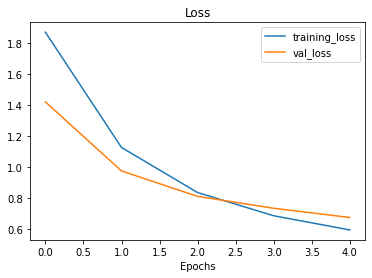

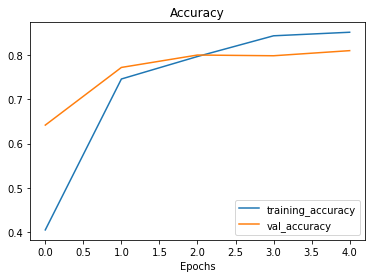

In [11]:
#check out our model's training curves
plot_loss_curves(history_10_percent)

# **Getting a feature vector from a trained model**

In [12]:
#define input tensor shape
input_shape=(1,4,4,3)

#Create a Random tensor
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)

print("Random input Tensor {}".format(input_tensor))


global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print("2D global average pooled random tensor {}".format(global_average_pooled_tensor))


#check the shapes of different tensors

print("Shape of input tensor: {}".format(input_tensor.shape))
print("Shape of 2D global averaged pooled input tensor: {}".format(global_average_pooled_tensor.shape))



Random input Tensor [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]
2D global average pooled random tensor [[-0.09368646 -0.45840445 -0.28855976]]
Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [13]:
tf.reduce_mean(input_tensor,axis=[1,2]) #average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [14]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip 

unzip_data("10_food_classes_1_percent.zip")

--2022-06-30 14:42:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   110MB/s    in 1.2s    

2022-06-30 14:42:24 (110 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [15]:
#Create train and test dirs
train_dir_1_percent="10_food_classes_1_percent/train/"
test_dir="10_food_classes_1_percent/test/"

In [16]:
#Walk through 1 percent data directory and list number of files
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There a

In [17]:
#Load the data
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                         label_mode="categorical",
                                                                         batch_size=32,
                                                                         image_size=IMG_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                         label_mode="categorical",
                                                                         batch_size=32,
                                                                         image_size=IMG_SIZE)



Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


# **Data Augmentation**

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

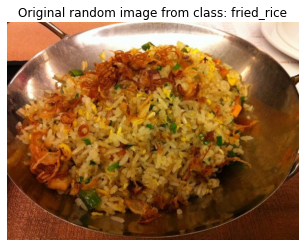

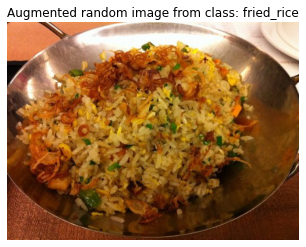

In [19]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

# **Model1:Feature Extraction Transfer Learning on 1% of the data with data augmentation**

In [20]:
train_data_1_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [21]:
#Setup input shape and base model,Freezing the base model layers
input_shape=(224,224,3)

base_model=tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable=False

#Create Input Layer
inputs=layers.Input(shape=input_shape,name="input_layer")

#Add in data augmentation Sequential model as a layer

x=data_augmentation(inputs)

#Give base_model inputs (after augmentation) and don't train it

x=base_model(x,training=False)

#Pool output Features of base model

x=layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#Put a Dense layer on as the Output

outputs=layers.Dense(10,activation="softmax",name="output_layer")(x)

#Make a model with inputs and outputs
model_1=keras.Model(inputs,outputs)

#Compile The Model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1_percent=model_1.fit(train_data_1_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_1_percent),
                               validation_data=test_data,
                               validation_steps=int(.25*len(test_data)),
                               callbacks=[create_tensorboard_callback("transfer_learning","1_percent_data_aug")])







Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220630-144229
Epoch 1/5
3/3 [==============================] - 54s 22s/step - loss: 2.3821 - accuracy: 0.0857 - val_loss: 2.2688 - val_accuracy: 0.1661
Epoch 2/5
3/3 [==============================] - 36s 17s/step - loss: 2.1472 - accuracy: 0.2429 - val_loss: 2.1605 - val_accuracy: 0.2237
Epoch 3/5
3/3 [==============================] - 45s 21s/step - loss: 1.9889 - accuracy: 0.3143 - val_loss: 2.0484 - val_accuracy: 0.2862
Epoch 4/5
3/3 [==============================] - 46s 22s/step - loss: 1.8318 - accuracy: 0.5286 - val_loss: 1.9369 - val_accuracy: 0.3734
Epoch 5/5
3/3 [==============================] - 37s 18s/step - loss: 1.7091 - accuracy: 0.6143 - val_loss: 1.8497 - val_accuracy: 0.4112


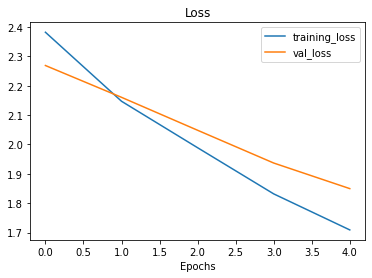

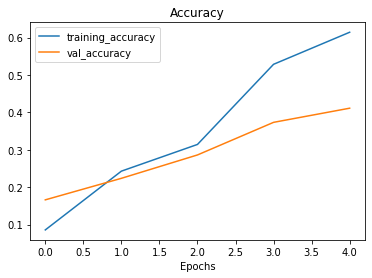

In [22]:
plot_loss_curves(history_1_percent)

# **Model 2:Feature extraction transfer learning with 10% data and data augmentation**

In [23]:
train_dir_10_percent="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

In [24]:
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                         label_mode="categorical",
                                                                         batch_size=32,
                                                                         image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.


In [25]:
#Create a functional model with Data Augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

#Build Data Augmentation Layer
data_augmentation=Sequential([
                              preprocessing.RandomFlip('horizontal'),
                              preprocessing.RandomHeight(0.2),
                              preprocessing.RandomWidth(0.2),
                              preprocessing.RandomZoom(0.2),
                              preprocessing.RandomRotation(0.2)


],name="data_augmentation")

#Setup the input shape to our model

input_shape=(224,224,3)

#Create a frozen base model 
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False


#Create input and Output layers
inputs =layers.Input(shape=input_shape,name="input_layer")#Create input layer
x=data_augmentation(inputs) #augment our training images
x=base_model(x,training=False)  #pass augmented images to base_model
x=layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs=layers.Dense(10,activation="softmax",name="output_layer")(x)

model_2=tf.keras.Model(inputs,outputs)


#Compile 
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])







/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Creating A ModelCheckPoint Callback:ModelCheck Point callback gives you the ability to save the model as a whoie SavedModel Format or the patterns to a specified directory as it trains.

#Why do we need this?
This is helpful  if our model is going to train for a long time  and we want to make backups of it as it trains.It also means if we think our model could benefit from being trained longer,we can reload it from a specific checkpoint and continue training from there.




In [26]:
#setup the checkpoint path
checkpoint_path="ten_percent_model_checkpoints_weights/checkpoint.ckpt"


#Create a ModelCheckPoint callback that saves the model model's weight only


checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       save_freq="epoch", #save every epoch
                                                       verbose=1)


# **#Fit The model saving checkpoints every epoch**

In [27]:
initial_epochs=10
history_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                       epochs=initial_epochs,
                                       validation_data=test_data,
                                       validation_steps=int(0.25*len(test_data)),
                                        callbacks=[create_tensorboard_callback("transfer_learnig","10_percent_data_aug"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learnig/10_percent_data_aug/20220630-144620
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 2.0155 - accuracy: 0.3333
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 93s 4s/step - loss: 2.0155 - accuracy: 0.3333 - val_loss: 1.5001 - val_accuracy: 0.6464
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.3799 - accuracy: 0.6560
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 83s 4s/step - loss: 1.3799 - accuracy: 0.6560 - val_loss: 1.0441 - val_accuracy: 0.7681
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 1.0592 - accuracy: 0.7493
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 84s 4s/step - loss: 1.0592 - accuracy: 0.7493 - val_loss: 0.8330 - val_accuracy: 0.8026
Epoch 4/

In [28]:
#Evaluate on the test data
results_10_percent_data_aug=model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 129s 2s/step - loss: 0.5625 - accuracy: 0.8264


[0.5624794960021973, 0.8263999819755554]

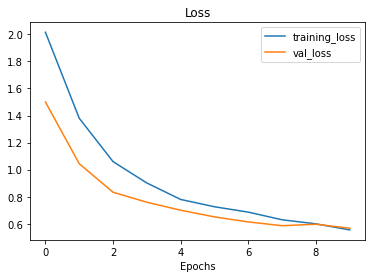

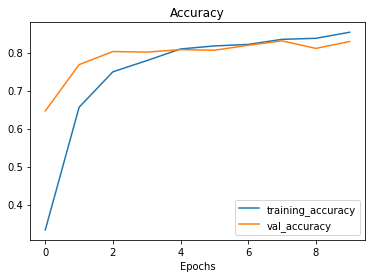

In [29]:
#Plot Model loss Curves
plot_loss_curves(history_10_percent_data_aug)

# **Model 3: Fine Tuning an existing model on the 10% of the data**

In [30]:
#layers in model 
model_2.layers

In [31]:
#How  many layers are trainable in our base model
print(len(model_2.layers[2].trainable_variables)) #layer at index 2 is the EfficientnetB0 layer

0


In [32]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

# Now to fine-tune the base model to our own data,we are going to unfreeze the the top 10 layers and continue training our model for another 5 epochs.

# This means all of the base model's layers except for the last 10 will remain frozen frozen and untrainable.And The weights in the remaining unfrozen layers will be updated during training.

In [33]:
#To begin fine-tuning,we'll unfreeze the entire base model by setting its trainable attribute to True
base_model.trainable=True

#Freeze all layers except for the 10
for layer in base_model.layers[:-10]:
  layer.trainable=False

#Recompile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), #lower the learning rate 10x than before for fine tuning
                metrics=["accuracy"])




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
#Check which layers are tuneable(trainable)
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [35]:
#Fine Tune for another 5 epochs
fine_tune_epochs=initial_epochs+5
history_fine_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                             epochs=fine_tune_epochs,
                                             validation_data=test_data,
                                             initial_epoch=history_10_percent_data_aug.epoch[-1], #start from previous last epoch
                                             validation_steps=int(0.25*len(test_data)),
                                             callbacks=[create_tensorboard_callback("transfer_learning","10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220630-150334
Epoch 10/15
24/24 [==============================] - 100s 4s/step - loss: 0.4918 - accuracy: 0.8547 - val_loss: 0.5039 - val_accuracy: 0.8322
Epoch 11/15
24/24 [==============================] - 89s 4s/step - loss: 0.4206 - accuracy: 0.8693 - val_loss: 0.4799 - val_accuracy: 0.8470
Epoch 12/15
24/24 [==============================] - 92s 4s/step - loss: 0.3705 - accuracy: 0.8907 - val_loss: 0.4928 - val_accuracy: 0.8388
Epoch 13/15
24/24 [==============================] - 90s 4s/step - loss: 0.3227 - accuracy: 0.9000 - val_loss: 0.5124 - val_accuracy: 0.8273
Epoch 14/15
24/24 [==============================] - 85s 4s/step - loss: 0.3148 - accuracy: 0.9053 - val_loss: 0.4615 - val_accuracy: 0.8454
Epoch 15/15
24/24 [==============================] - 94s 4s/step - loss: 0.2700 - accuracy: 0.9160 - val_loss: 0.4581 - val_accuracy: 0.8520


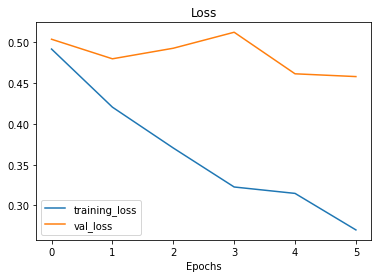

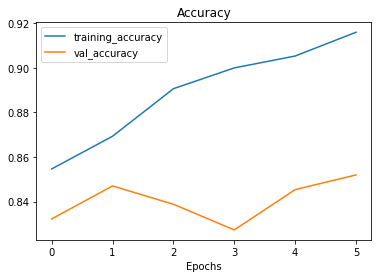

In [36]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [52]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

10
16
[0.3333333432674408, 0.656000018119812, 0.7493333220481873, 0.7786666750907898, 0.809333324432373, 0.8173333406448364, 0.8213333487510681, 0.8346666693687439, 0.8373333215713501, 0.8533333539962769, 0.8546666502952576, 0.8693333268165588, 0.890666663646698, 0.8999999761581421, 0.9053333401679993, 0.9160000085830688]


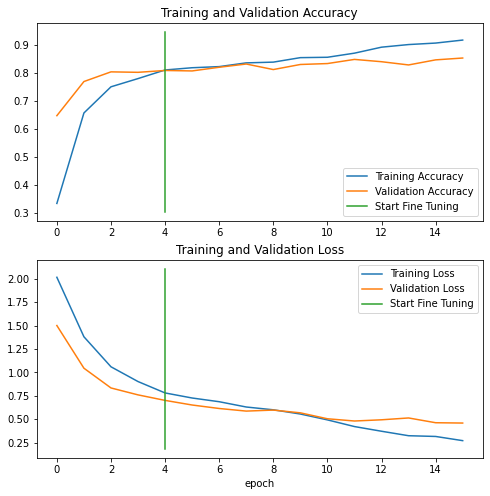

In [53]:
compare_historys(original_history=history_10_percent_data_aug, 
                 new_history=history_fine_10_percent_data_aug, 
                 initial_epochs=5)

# **Model 4:Fine Tuning an existing model all of the Data**

In [37]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

unzip_data("10_food_classes_all_data.zip")

#Setup data Directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"




--2022-06-30 15:15:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 173.194.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   155MB/s    in 3.2s    

2022-06-30 15:15:29 (155 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [38]:
#How many images we are working with
walk_through_dir("10_food_classes_all_data")



There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [39]:
#Setup data images
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10_classes_full=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                               label_mode="categorical",
                                                                               image_size=IMG_SIZE) 
test_data_10_classes_full=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                               label_mode="categorical",
                                                                               image_size=IMG_SIZE) 


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [40]:
model_2.evaluate(test_data)

79/79 [==============================] - 154s 2s/step - loss: 0.4871 - accuracy: 0.8364


[0.48711758852005005, 0.8363999724388123]

In [41]:
#load model_from checkpoint,that we can fine tune from the stage the 10 percent data model
model_2.load_weights(checkpoint_path)

In [42]:
model_2.evaluate(test_data)

79/79 [==============================] - 173s 2s/step - loss: 0.5625 - accuracy: 0.8264


[0.5624796152114868, 0.8263999819755554]

In [43]:
#Check which layers are tuneable in the whole model
for layer_number,layer in enumerate (model_2.layers):
  print(layer_number,layer.name,layer.trainable)


0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
for layer_number,layer in enumerate (base_model.layers):
  print(layer_number,layer.name,layer.trainable)


In [49]:
#compile 
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [50]:
#Continue to train and fine tune the model to our data
# Continue to train and fine-tune the model to our data
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])


Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20220630-153304
Epoch 10/15
235/235 [==============================] - 592s 2s/step - loss: 0.6860 - accuracy: 0.7797 - val_loss: 0.4030 - val_accuracy: 0.8684
Epoch 11/15
235/235 [==============================] - 566s 2s/step - loss: 0.5793 - accuracy: 0.8156 - val_loss: 0.3635 - val_accuracy: 0.8783
Epoch 12/15
235/235 [==============================] - 585s 2s/step - loss: 0.5226 - accuracy: 0.8285 - val_loss: 0.3654 - val_accuracy: 0.8799
Epoch 13/15
235/235 [==============================] - 594s 3s/step - loss: 0.4758 - accuracy: 0.8455 - val_loss: 0.3345 - val_accuracy: 0.8931
Epoch 14/15
235/235 [==============================] - 560s 2s/step - loss: 0.4323 - accuracy: 0.8580 - val_loss: 0.3450 - val_accuracy: 0.8865
Epoch 15/15
235/235 [==============================] - 542s 2s/step - loss: 0.4006 - accuracy: 0.8680 - val_loss: 0.3049 - val_accuracy: 0.8865


In [54]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 142s 2s/step - loss: 0.3025 - accuracy: 0.8980


[0.30247342586517334, 0.8980000019073486]

10
16
[0.3333333432674408, 0.656000018119812, 0.7493333220481873, 0.7786666750907898, 0.809333324432373, 0.8173333406448364, 0.8213333487510681, 0.8346666693687439, 0.8373333215713501, 0.8533333539962769, 0.7797333598136902, 0.8155999779701233, 0.8285333514213562, 0.845466673374176, 0.8579999804496765, 0.8679999709129333]


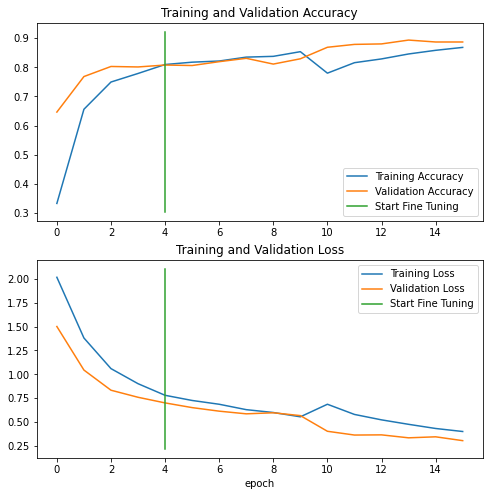

In [55]:
# How did fine-tuning go with more data?
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

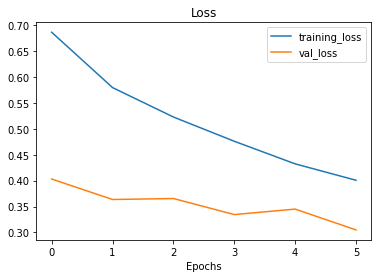

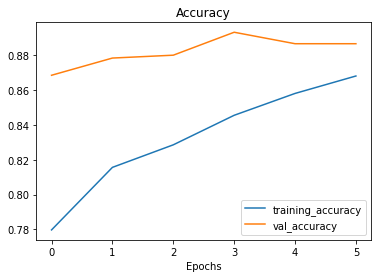

In [51]:
plot_loss_curves(history_fine_10_classes_full)

# **Viewing our experiment data on TensorBoard**

In [ ]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot # exits the uploader when upload has finished